<a href="https://colab.research.google.com/github/walker-617/NLP-Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import spacy
import warnings
from IPython.display import display

In [ ]:
# Ignoring warnings

warnings.filterwarnings("ignore")

# **Feature Selection**



*   Selecting only text and dropping headers, footers and author.

*   Selcting only 4 categories.






In [ ]:
# Feature selection

# Dropping headers, footers and authors
# Using only text feature

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

newsgroups_train = fetch_20newsgroups(subset='train',categories=categories, remove=('headers', 'footers', 'quotes'))



---





*   Pie chart for target categories



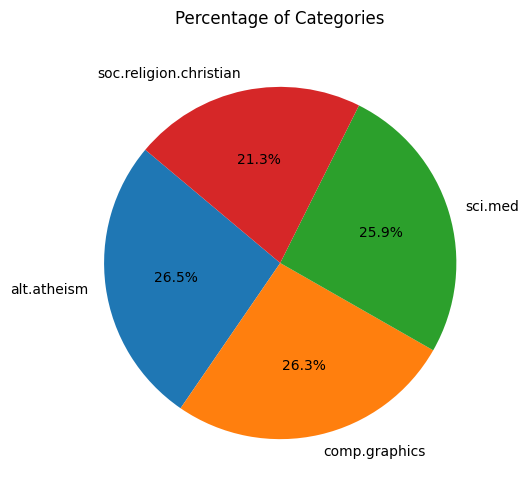

In [ ]:
category_counts = pd.Series(newsgroups_train.target).value_counts()
category_percentages = category_counts / category_counts.sum() * 100

plt.figure(figsize=(5, 6))
plt.pie(category_percentages, labels=newsgroups_train.target_names, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Categories')
plt.axis('equal')
plt.show()


# **Creating dataframe**

In [ ]:
# Creating dataframe

df = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})
df['target'] = df['target'].map(lambda x: newsgroups_train.target_names[x])

print("Original Dataset:")
print("shape of dataframe:",df.shape)
display(df.head())

Original Dataset:
shape of dataframe: (2257, 2)


,text,target
0,Does anyone know of a good way (standard PC ap...,comp.graphics
1,"Hi,\n\n\tI have a problem, I hope some of the ...",comp.graphics
2,"(Well, I'll email also, but this may apply to ...",soc.religion.christian
3,"Hello,\n\nI'm writing a paper on the role of t...",soc.religion.christian
4,,soc.religion.christian


# **Data Cleaning**



*   Handling null values





In [ ]:
# Handling missing data

display(df.head())
count=(df['text'] == '').sum()
print("\nNUll texts before removing: ",count,"\n")

df = df[df['text'] != '']
display(df.head())

count=(df['text'] == '').sum()
print("\nNUll texts after removing: ",count)

,text,target
0,Does anyone know of a good way (standard PC ap...,comp.graphics
1,"Hi,\n\n\tI have a problem, I hope some of the ...",comp.graphics
2,"(Well, I'll email also, but this may apply to ...",soc.religion.christian
3,"Hello,\n\nI'm writing a paper on the role of t...",soc.religion.christian
4,,soc.religion.christian



NUll texts before removing:  36 



,text,target
0,Does anyone know of a good way (standard PC ap...,comp.graphics
1,"Hi,\n\n\tI have a problem, I hope some of the ...",comp.graphics
2,"(Well, I'll email also, but this may apply to ...",soc.religion.christian
3,"Hello,\n\nI'm writing a paper on the role of t...",soc.religion.christian
5,\n\n\nLet me carry that a step further. Most ...,soc.religion.christian



NUll texts after removing:  0




---





*   Data cleaning
    *   Removing URLs
    *   Removing HTML tags
    *   Removing  special characters
    *   Removing extra spaces
    *   Converting to lower case







In [ ]:
# Data Cleaning

df['cleaned_text'] = df['text'].str.replace(r'https?://\S+|www\.\S+', ' ')
df['cleaned_text'] = df['cleaned_text'].str.replace(r'<.*?>',' ')
df['cleaned_text'] = df['cleaned_text'].str.replace(r'[^\w\s\d]',' ')
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\s{2,}',' ')
df['cleaned_text'] = df['cleaned_text'].str.strip()
df['cleaned_text'] = df['cleaned_text'].str.lower()
display(df[["text","cleaned_text"]].head())

,text,cleaned_text
0,Does anyone know of a good way (standard PC ap...,does anyone know of a good way (standard pc ap...
1,"Hi,\n\n\tI have a problem, I hope some of the ...","hi,\n\n\ti have a problem, i hope some of the ..."
2,"(Well, I'll email also, but this may apply to ...","(well, i'll email also, but this may apply to ..."
3,"Hello,\n\nI'm writing a paper on the role of t...","hello,\n\ni'm writing a paper on the role of t..."
5,\n\n\nLet me carry that a step further. Most ...,let me carry that a step further. most doctor...




---



# **Data Pre processing**



*   Removing stopwords





In [ ]:
# Removing stop words

nltk.download('stopwords',quiet=True)
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    filtered_tokens = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(filtered_tokens)

df['stopwords_removed_text'] = df['cleaned_text'].apply(remove_stopwords)
display(df[["cleaned_text","stopwords_removed_text"]].head())

,cleaned_text,stopwords_removed_text
0,does anyone know of a good way (standard pc ap...,anyone know good way (standard pc application/...
1,"hi,\n\n\ti have a problem, i hope some of the ...","hi, problem, hope 'gurus' help solve. backgrou..."
2,"(well, i'll email also, but this may apply to ...","(well, i'll email also, may apply people, i'll..."
3,"hello,\n\ni'm writing a paper on the role of t...","hello, i'm writing paper role catholic church ..."
5,let me carry that a step further. most doctor...,let carry step further. doctors would claim in...




---



*   Stemming





In [ ]:
# Stemming

stemmer = PorterStemmer()

def stem(text):
    stems = [stemmer.stem(token) for token in text.split()]
    return " ".join(stems)

df['stemmed_text'] = df['stopwords_removed_text'].apply(stem)
display(df[["stopwords_removed_text","stemmed_text"]].head())

,stopwords_removed_text,stemmed_text
0,anyone know good way (standard pc application/...,anyon know good way (standard pc application/p...
1,"hi, problem, hope 'gurus' help solve. backgrou...","hi, problem, hope 'gurus' help solve. backgrou..."
2,"(well, i'll email also, may apply people, i'll...","(well, i'll email also, may appli people, i'll..."
3,"hello, i'm writing paper role catholic church ...","hello, i'm write paper role cathol church pola..."
5,let carry step further. doctors would claim in...,let carri step further. doctor would claim inf...




---





*   Lemmatizing and Tokenizing





In [ ]:
# Lemmatization and Tokenizing

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatize_text(text):
    lemmatized_tokens = [token.lemma_ for token in nlp(text)]
    return lemmatized_tokens

df['lemmatized_and_tokenized_text'] = df['stemmed_text'].apply(lemmatize_text)
display(df[["stemmed_text","lemmatized_and_tokenized_text"]].head())

,stemmed_text,lemmatized_and_tokenized_text
0,anyon know good way (standard pc application/p...,"[anyon, know, good, way, (, standard, pc, appl..."
1,"hi, problem, hope 'gurus' help solve. backgrou...","[hi, ,, problem, ,, hope, ', guru, ', help, so..."
2,"(well, i'll email also, may appli people, i'll...","[(, well, ,, I, will, email, also, ,, may, app..."
3,"hello, i'm write paper role cathol church pola...","[hello, ,, I, be, write, paper, role, cathol, ..."
5,let carri step further. doctor would claim inf...,"[let, carri, step, far, ., doctor, would, clai..."




---



# **Feature Engineering**



*   Coverting into bigrams


In [ ]:
# Feature Engineering
# Converting into bigrams

def convert_into_bigrams(text):
    return [" ".join(bigram) for bigram in nltk.bigrams(text)]

df['bigramed_text'] = df['lemmatized_and_tokenized_text'].apply(convert_into_bigrams)
display(df[["lemmatized_and_tokenized_text","bigramed_text"]].head())

,lemmatized_and_tokenized_text,bigramed_text
0,"[anyon, know, good, way, (, standard, pc, appl...","[anyon know, know good, good way, way (, ( sta..."
1,"[hi, ,, problem, ,, hope, ', guru, ', help, so...","[hi ,, , problem, problem ,, , hope, hope ', '..."
2,"[(, well, ,, I, will, email, also, ,, may, app...","[( well, well ,, , I, I will, will email, emai..."
3,"[hello, ,, I, be, write, paper, role, cathol, ...","[hello ,, , I, I be, be write, write paper, pa..."
5,"[let, carri, step, far, ., doctor, would, clai...","[let carri, carri step, step far, far ., . doc..."




---



# **Detecting and removing outliers**



* Detecting outliers with text length as the measure


In [ ]:
# Creating length coloumn for detecting outliers

df['text_length'] = df['stemmed_text'].apply(len)
display(df[["stemmed_text","text_length"]].head())

,stemmed_text,text_length
0,anyon know good way (standard pc application/p...,218
1,"hi, problem, hope 'gurus' help solve. backgrou...",448
2,"(well, i'll email also, may appli people, i'll...",1316
3,"hello, i'm write paper role cathol church pola...",239
5,let carri step further. doctor would claim inf...,344




---





*   Standardizing text length


In [ ]:
# Standardizing length column

scaler = StandardScaler()

# Reshape the input array to make it 2D
text_length_values = df['text_length'].values.reshape(-1, 1)

# Fit the scaler on the 'text_length' column and transform it
df['standardized_length'] = scaler.fit_transform(df[['text_length']])

# Print the DataFrame with standardized length
display(df[["stemmed_text","text_length","standardized_length"]].head())

,stemmed_text,text_length,standardized_length
0,anyon know good way (standard pc application/p...,218,-0.248537
1,"hi, problem, hope 'gurus' help solve. backgrou...",448,-0.151220
2,"(well, i'll email also, may appli people, i'll...",1316,0.216047
3,"hello, i'm write paper role cathol church pola...",239,-0.239651
5,let carri step further. doctor would claim inf...,344,-0.195224




---





*   Plotting Gaussian distribution


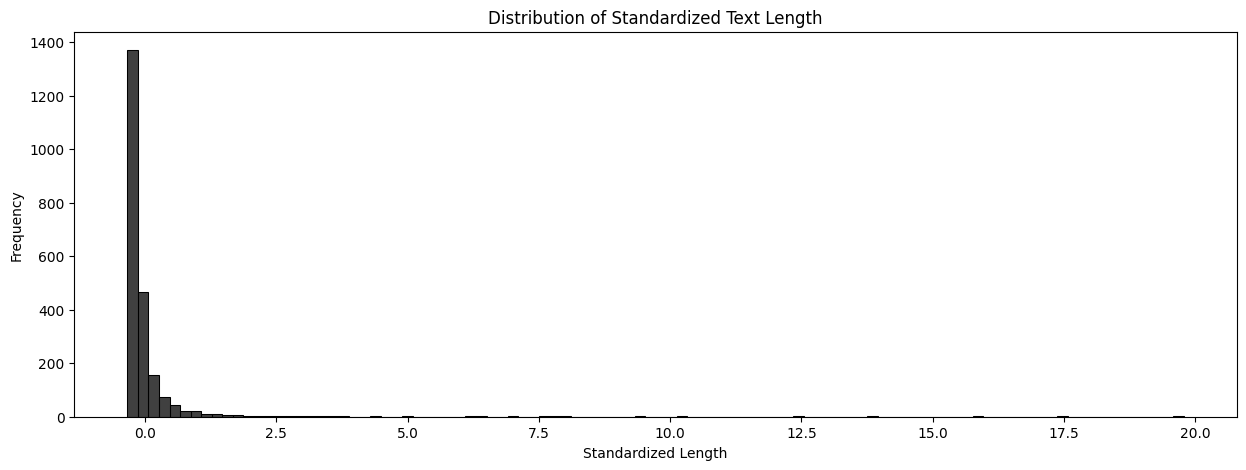

In [ ]:
# Visualizing the Gaussian Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of standardized text length
plt.figure(figsize=(15, 5))
sns.histplot(df['standardized_length'], color='black', bins=100)
plt.title('Distribution of Standardized Text Length')
plt.xlabel('Standardized Length')
plt.ylabel('Frequency')
plt.show()



---





*   Identifying the outliers by setting threshold


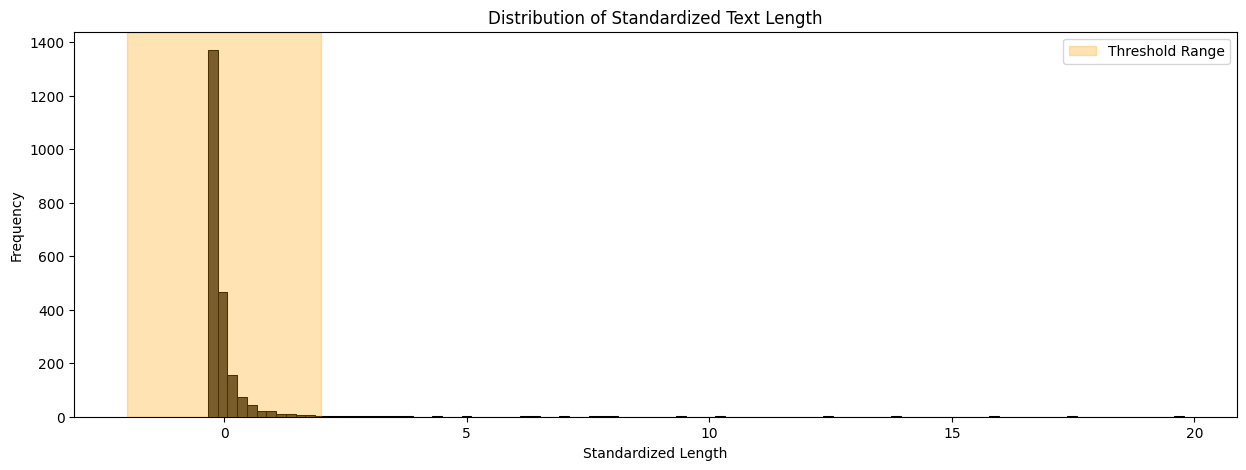

In [ ]:
# Identifying the outliers by setting a threshold

threshold = 2
mean=df['standardized_length'].mean()
std=df['standardized_length'].std()

# Calculate the upper and lower bounds for outlier detection
upper_bound = mean + threshold * std
lower_bound = mean - threshold * std

plt.figure(figsize=(15, 5))
sns.histplot(df['standardized_length'], color='black', bins=100)
plt.title('Distribution of Standardized Text Length')
plt.xlabel('Standardized Length')
plt.ylabel('Frequency')

plt.axvspan(lower_bound, upper_bound, color='orange', alpha=0.3,label="Threshold Range")

# Add legend
plt.legend()

plt.show()




---





*   Removing outliers


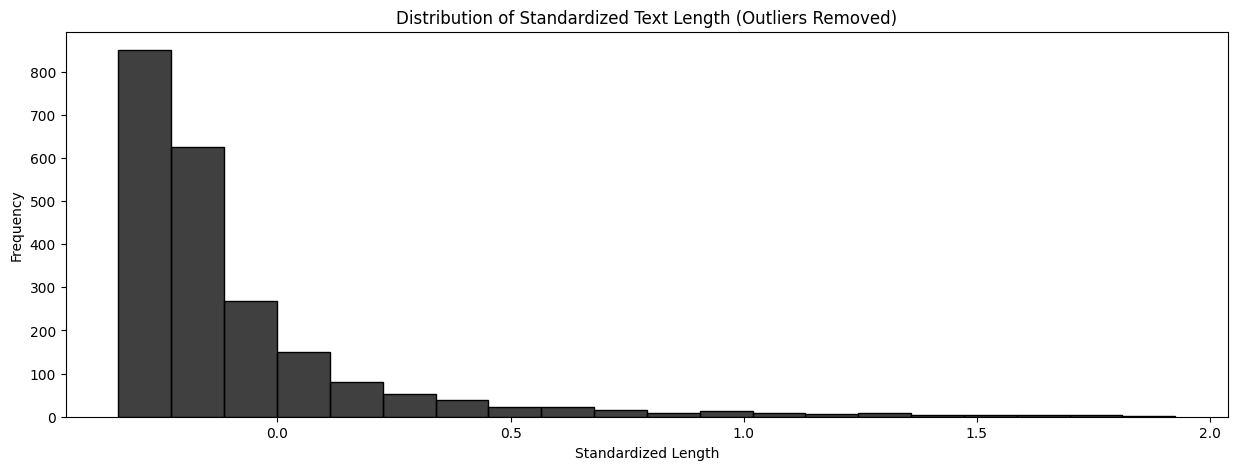

In [ ]:
# Removing outliers

filtered_df = df[(df['standardized_length'] >= lower_bound) & (df['standardized_length'] <= upper_bound)]

# Visualize the distribution of standardized text length after outlier removal
plt.figure(figsize=(15, 5))
sns.histplot(filtered_df['standardized_length'], color='black', bins=20)
plt.title('Distribution of Standardized Text Length (Outliers Removed)')
plt.xlabel('Standardized Length')
plt.ylabel('Frequency')
plt.show()



---





*   Comparing updated dataframe


In [ ]:
# Number of rows removed

num_rows1 = df.shape[0]
print("Number of rows before removing outliers:", num_rows1)

num_rows2 = filtered_df.shape[0]
print("Number of rows after removing outliers:", num_rows2)

print("Number of rows removed are:",num_rows1-num_rows2)

Number of rows before removing outliers: 2221
Number of rows after removing outliers: 2188
Number of rows removed are: 33




---



# **Vectorizing the dataset**



*   using TFIDF vectorizer to vectorize the dataset



In [ ]:
# Vectorizing the filtered dataframe for model training

vectorizer = TfidfVectorizer(tokenizer=lambda x:x,lowercase=False)

tfidf_matrix = vectorizer.fit_transform(filtered_df["bigramed_text"])

feature_names = vectorizer.get_feature_names_out()

print("TF-IDF Matrix :")
print(tfidf_matrix.toarray())
print("\nTotal number of features are : ",len(feature_names))

TF-IDF Matrix :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Total number of features are :  145292
